<div align="center" style="font-family:Georgia, serif; color:red;">

<strong style="font-size: 20px;">Escuela Politécnica Nacional</strong><br>
<strong style="font-size: 20px;">Facultad de Ingenieria en Sistemas</strong><br>
<strong style="font-size: 20px;">Métodos Numéricos</strong>


</div>

-----------------

<p style="font-family:Georgia, serif;">
  <strong style="color:red;">Nombre:</strong> 
  <span>
  
  Dany Molina

  Kevin Gomez
  </span>
</p>


<p style= "font-family:Georgia, serif;">
  <strong style = "color:red;">Fecha:</strong> 
  <span>15/07/2025</span>
</p>

<div style="text-align: center; font-family:Georgia, serif; margin-top: 20px;">

<h4><strong>Gauss Jacobi y Gauss Seiddel

 </strong></h4>

</div>

------------
Enlace a Git Hub:

https://github.com/DanyMolinaN/Metodos2025A-main.git

### Método Jacobi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from src.iterative_methods import gauss_jacobi  

def plot_system(ax, A, b, xlim=(-10, 10)):
    x_vals = np.linspace(xlim[0], xlim[1], 400)
    for i in range(2):
        if A[i, 1] != 0:
            y_vals = (b[i] - A[i, 0] * x_vals) / A[i, 1]
            ax.plot(x_vals, y_vals, label=f"Ecuación {i+1}")
        else:
            x_const = b[i] / A[i, 0]
            ax.axvline(x_const, linestyle='--', label=f"Ecuación {i+1}")


def aplicar_relajacion(trayectoria, omega=0.5):
    relajada = [trayectoria[0].copy()]
    for k in range(1, len(trayectoria)):
        x_prev = relajada[-1]
        x_curr = trayectoria[k]
        x_relaxed = (1 - omega) * x_prev + omega * x_curr
        relajada.append(x_relaxed)
    return relajada


def animate_jacobi(ax, traj, label):
    traj_array = np.hstack(traj)
    x1_vals = traj_array[0, :]
    x2_vals = traj_array[1, :]

    line, = ax.plot([], [], 'o-', label=label)
    texts = []

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        line.set_data(x1_vals[:frame + 1], x2_vals[:frame + 1])
        for txt in texts:
            txt.remove()
        texts.clear()
        for i in range(frame + 1):
            txt = ax.text(x1_vals[i], x2_vals[i], str(i), fontsize=7, ha='right')
            texts.append(txt)
        return line, *texts

    ani = animation.FuncAnimation(
        fig=ax.figure,
        func=update,
        init_func=init,
        frames=len(x1_vals),
        interval=600,
        blit=False,
        repeat=False
    )
    return ani


# ==================================
# Configuración general
# ==================================
tol = 1e-5
max_iter = 50

# Estimaciones iniciales
x0_list = [
    np.array([[0.0], [0.0]]),        # Divergente
    np.array([[5.0], [2.0]]),        # También puede diverger
    np.array([[1.8], [3.6]])         # Aproximadamente cerca de (2, 4) → Convergente
]
# ==================================
# Sistema 1: x₁ + x₂ = 7 ; −2x₁ + 5x₂ = 0
# ==================================
A1 = np.array([[1, 1], [-2, 5]], dtype=float)
b1 = np.array([[7], [0]], dtype=float)

print("\n--- Sistema 1 ---")
for i, x0 in enumerate(x0_list):
    x_sol, traj1 = gauss_jacobi(A=A1, b=b1, x0=x0, tol=tol, max_iter=max_iter)
    diverge = any(np.linalg.norm(x) > 1e6 for x in traj1)

    if diverge:
        print(f"⚠️  Divergencia detectada en Sistema 1 con x0 = {x0.ravel().tolist()}")
    else:
        print(f"✅ Convergencia en Sistema 1 con x0 = {x0.ravel().tolist()}")

    fig, ax = plt.subplots(figsize=(6, 6))
    plot_system(ax, A1, b1)
    ani = animate_jacobi(ax, traj1, label=f"Inicial: {x0.ravel().tolist()}")

    ax.set_title("Sistema 1: $x₁ + x₂ = 7$, $-2x₁ + 5x₂ = 0$")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)
    ax.grid(True)
    ax.axis('equal')
    ax.legend()
    plt.tight_layout()

    ani.save(f"sistema1_init{i + 1}.gif", writer='pillow')
    plt.close(fig)


# ==================================
# Sistema 2: x₁ + x₂ = 6 ; −2x₁ + x₂ = 0
# ==================================
A2 = np.array([[1, 1], [-2, 1]], dtype=float)
b2 = np.array([[6], [0]], dtype=float)

print("\n--- Sistema 2 ---")
for i, x0 in enumerate(x0_list):
    x_sol, traj2 = gauss_jacobi(A=A2, b=b2, x0=x0, tol=tol, max_iter=max_iter)
    traj2 = aplicar_relajacion(traj2, omega=0.5)
    diverge = any(np.linalg.norm(x) > 1e6 for x in traj2)

    if diverge:
        print(f"⚠️  Divergencia detectada en Sistema 2 con x0 = {x0.ravel().tolist()}")
    else:
        print(f"✅ Convergencia en Sistema 2 con x0 = {x0.ravel().tolist()}")

    fig, ax = plt.subplots(figsize=(6, 6))
    plot_system(ax, A2, b2)
    ani = animate_jacobi(ax, traj2, label=f"Inicial: {x0.ravel().tolist()}")

    ax.set_title("Sistema 2: $x₁ + x₂ = 6$, $-2x₁ + x₂ = 0$")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)
    ax.grid(True)
    ax.axis('equal')
    ax.legend()
    plt.tight_layout()

    ani.save(f"sistema2_init{i + 1}.gif", writer='pillow')
    plt.close(fig)


[07-15 21:15:53][INFO] 2025-07-15 21:15:53.857851
[07-15 21:15:53][INFO] 2025-07-15 21:15:53.859880

--- Sistema 1 ---
[07-15 21:15:53][INFO] i= 0 x: [[0. 0.]]
[07-15 21:15:53][INFO] i= 1 x: [[7. 0.]]
[07-15 21:15:53][INFO] i= 2 x: [[7.  2.8]]
[07-15 21:15:53][INFO] i= 3 x: [[4.2 2.8]]
[07-15 21:15:53][INFO] i= 4 x: [[4.2  1.68]]
[07-15 21:15:53][INFO] i= 5 x: [[5.32 1.68]]
[07-15 21:15:53][INFO] i= 6 x: [[5.32  2.128]]
[07-15 21:15:53][INFO] i= 7 x: [[4.872 2.128]]
[07-15 21:15:53][INFO] i= 8 x: [[4.872  1.9488]]
[07-15 21:15:53][INFO] i= 9 x: [[5.0512 1.9488]]
[07-15 21:15:53][INFO] i= 10 x: [[5.0512  2.02048]]
[07-15 21:15:53][INFO] i= 11 x: [[4.97952 2.02048]]
[07-15 21:15:53][INFO] i= 12 x: [[4.97952  1.991808]]
[07-15 21:15:53][INFO] i= 13 x: [[5.008192 1.991808]]
[07-15 21:15:53][INFO] i= 14 x: [[5.008192  2.0032768]]
[07-15 21:15:53][INFO] i= 15 x: [[4.9967232 2.0032768]]
[07-15 21:15:53][INFO] i= 16 x: [[4.9967232  1.99868928]]
[07-15 21:15:53][INFO] i= 17 x: [[5.00131072 1.99

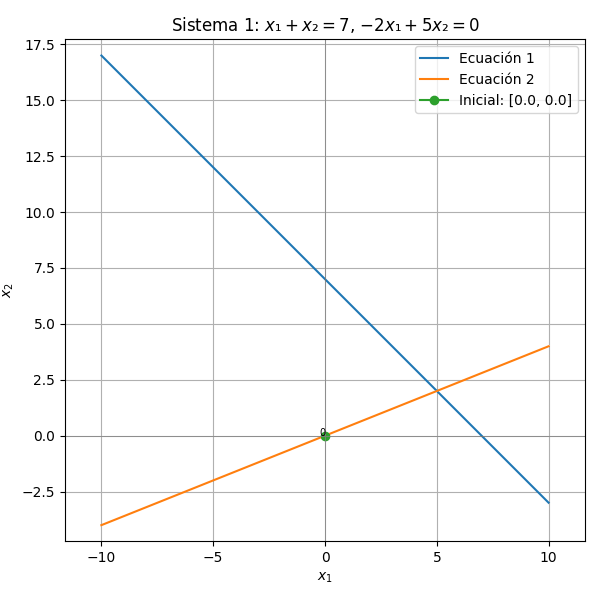

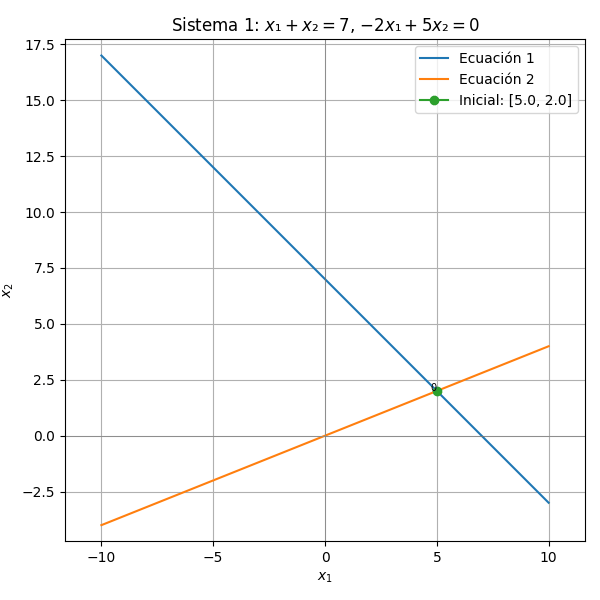

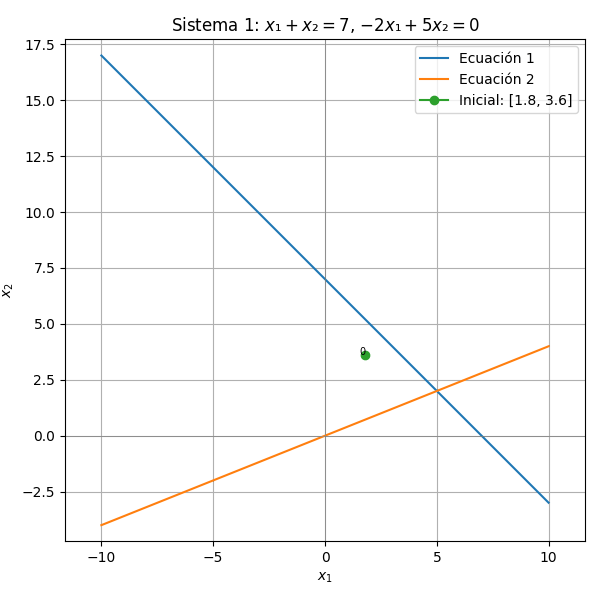

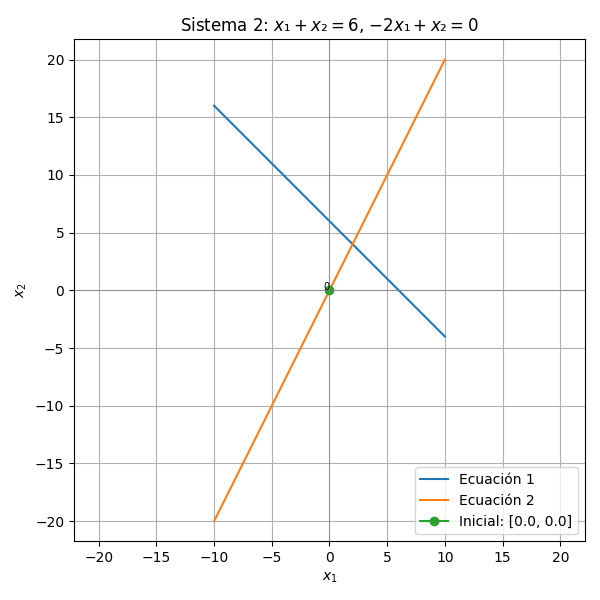

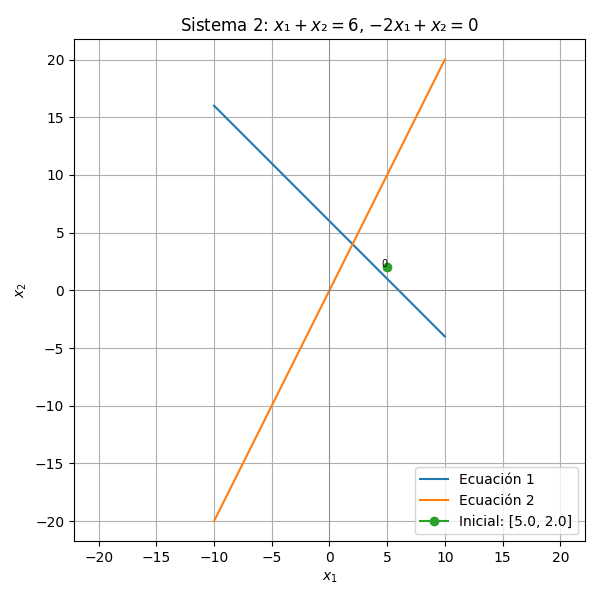

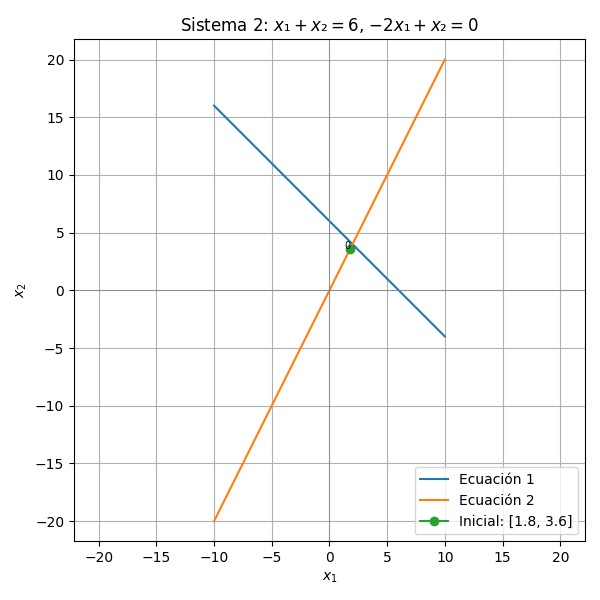



### Método Seiddel


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from src.iterative_methods import gauss_seidel  # <- Ahora usamos gauss_seidel

def plot_system(ax, A, b, xlim=(-10, 10)):
    x_vals = np.linspace(xlim[0], xlim[1], 400)
    for i in range(2):
        if A[i, 1] != 0:
            y_vals = (b[i] - A[i, 0] * x_vals) / A[i, 1]
            ax.plot(x_vals, y_vals, label=f"Ecuación {i+1}")
        else:
            x_const = b[i] / A[i, 0]
            ax.axvline(x_const, linestyle='--', label=f"Ecuación {i+1}")

def aplicar_relajacion(trayectoria, omega=0.5):
    relajada = [trayectoria[0].copy()]
    for k in range(1, len(trayectoria)):
        x_prev = relajada[-1]
        x_curr = trayectoria[k]
        x_relaxed = (1 - omega) * x_prev + omega * x_curr
        relajada.append(x_relaxed)
    return relajada

def animate_jacobi(ax, traj, label):
    traj_array = np.hstack(traj)
    x1_vals = traj_array[0, :]
    x2_vals = traj_array[1, :]

    line, = ax.plot([], [], 'o-', label=label)
    texts = []

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        line.set_data(x1_vals[:frame + 1], x2_vals[:frame + 1])
        for txt in texts:
            txt.remove()
        texts.clear()
        for i in range(frame + 1):
            txt = ax.text(x1_vals[i], x2_vals[i], str(i), fontsize=7, ha='right')
            texts.append(txt)
        return line, *texts

    ani = animation.FuncAnimation(
        fig=ax.figure,
        func=update,
        init_func=init,
        frames=len(x1_vals),
        interval=600,
        blit=False,
        repeat=False
    )
    return ani

# ==================================
# Configuración general
# ==================================
tol = 1e-5
max_iter = 50

# Estimaciones iniciales
x0_list = [
    np.array([[0.0], [0.0]]),        # Divergente
    np.array([[5.0], [2.0]]),        # También puede diverger
    np.array([[1.8], [3.6]])         # Aproximadamente cerca de (2, 4) → Convergente
]

# ==================================
# Sistema 1: x₁ + x₂ = 7 ; −2x₁ + 5x₂ = 0
# ==================================
A1 = np.array([[1, 1], [-2, 5]], dtype=float)
b1 = np.array([[7], [0]], dtype=float)

print("\n--- Sistema 1 ---")
for i, x0 in enumerate(x0_list):
    x_sol, traj1 = gauss_seidel(A=A1, b=b1, x0=x0, tol=tol, max_iter=max_iter)
    diverge = any(np.linalg.norm(x) > 1e6 for x in traj1)

    if diverge:
        print(f"⚠️  Divergencia detectada en Sistema 1 con x0 = {x0.ravel().tolist()}")
    else:
        print(f"✅ Convergencia en Sistema 1 con x0 = {x0.ravel().tolist()}")

    fig, ax = plt.subplots(figsize=(6, 6))
    plot_system(ax, A1, b1)
    ani = animate_jacobi(ax, traj1, label=f"Inicial: {x0.ravel().tolist()}")

    ax.set_title("Sistema 1: $x₁ + x₂ = 7$, $-2x₁ + 5x₂ = 0$")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)
    ax.grid(True)
    ax.axis('equal')
    ax.legend()
    plt.tight_layout()

    ani.save(f"sistema1_gs_init{i + 1}.gif", writer='pillow')
    plt.close(fig)

# ==================================
# Sistema 2: x₁ + x₂ = 6 ; −2x₁ + x₂ = 0
# ==================================
A2 = np.array([[1, 1], [-2, 1]], dtype=float)
b2 = np.array([[6], [0]], dtype=float)

print("\n--- Sistema 2 ---")
for i, x0 in enumerate(x0_list):
    x_sol, traj2 = gauss_seidel(A=A2, b=b2, x0=x0, tol=tol, max_iter=max_iter)
    traj2 = aplicar_relajacion(traj2, omega=0.5)
    diverge = any(np.linalg.norm(x) > 1e6 for x in traj2)

    if diverge:
        print(f"⚠️  Divergencia detectada en Sistema 2 con x0 = {x0.ravel().tolist()}")
    else:
        print(f"✅ Convergencia en Sistema 2 con x0 = {x0.ravel().tolist()}")

    fig, ax = plt.subplots(figsize=(6, 6))
    plot_system(ax, A2, b2)
    ani = animate_jacobi(ax, traj2, label=f"Inicial: {x0.ravel().tolist()}")

    ax.set_title("Sistema 2: $x₁ + x₂ = 6$, $-2x₁ + x₂ = 0$")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)
    ax.grid(True)
    ax.axis('equal')
    ax.legend()
    plt.tight_layout()

    ani.save(f"sistema2_gs_init{i + 1}.gif", writer='pillow')
    plt.close(fig)



--- Sistema 1 ---
[07-15 21:26:47][INFO] i= 0 x: [[0. 0.]]
[07-15 21:26:47][INFO] i= 1 x: [[7.  2.8]]
[07-15 21:26:47][INFO] i= 2 x: [[4.2  1.68]]
[07-15 21:26:47][INFO] i= 3 x: [[5.32  2.128]]
[07-15 21:26:47][INFO] i= 4 x: [[4.872  1.9488]]
[07-15 21:26:47][INFO] i= 5 x: [[5.0512  2.02048]]
[07-15 21:26:47][INFO] i= 6 x: [[4.97952  1.991808]]
[07-15 21:26:47][INFO] i= 7 x: [[5.008192  2.0032768]]
[07-15 21:26:47][INFO] i= 8 x: [[4.9967232  1.99868928]]
[07-15 21:26:47][INFO] i= 9 x: [[5.00131072 2.00052429]]
[07-15 21:26:47][INFO] i= 10 x: [[4.99947571 1.99979028]]
[07-15 21:26:47][INFO] i= 11 x: [[5.00020972 2.00008389]]
[07-15 21:26:47][INFO] i= 12 x: [[4.99991611 1.99996645]]
[07-15 21:26:47][INFO] i= 13 x: [[5.00003355 2.00001342]]
[07-15 21:26:47][INFO] i= 14 x: [[4.99998658 1.99999463]]
[07-15 21:26:47][INFO] i= 15 x: [[5.00000537 2.00000215]]
✅ Convergencia en Sistema 1 con x0 = [0.0, 0.0]
[07-15 21:26:47][INFO] Animation.save using <class 'matplotlib.animation.PillowWriter'>

C:\Users\Sistemas\AppData\Local\Temp\ipykernel_11464\710727983.py:135: MatplotlibDeprecationWarning: The y parameter as float was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use int(y) instead.
  ani.save(f"sistema2_gs_init{i + 1}.gif", writer='pillow')
C:\Users\Sistemas\AppData\Local\Temp\ipykernel_11464\710727983.py:135: MatplotlibDeprecationWarning: The x parameter as float was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use int(x) instead.
  ani.save(f"sistema2_gs_init{i + 1}.gif", writer='pillow')


[07-15 21:27:06][INFO] i= 0 x: [[5. 2.]]
[07-15 21:27:06][INFO] i= 1 x: [[4. 8.]]
[07-15 21:27:06][INFO] i= 2 x: [[-2. -4.]]
[07-15 21:27:06][INFO] i= 3 x: [[10. 20.]]
[07-15 21:27:06][INFO] i= 4 x: [[-14. -28.]]
[07-15 21:27:06][INFO] i= 5 x: [[34. 68.]]
[07-15 21:27:06][INFO] i= 6 x: [[ -62. -124.]]
[07-15 21:27:06][INFO] i= 7 x: [[130. 260.]]
[07-15 21:27:06][INFO] i= 8 x: [[-254. -508.]]
[07-15 21:27:06][INFO] i= 9 x: [[ 514. 1028.]]
[07-15 21:27:06][INFO] i= 10 x: [[-1022. -2044.]]
[07-15 21:27:06][INFO] i= 11 x: [[2050. 4100.]]
[07-15 21:27:06][INFO] i= 12 x: [[-4094. -8188.]]
[07-15 21:27:06][INFO] i= 13 x: [[ 8194. 16388.]]
[07-15 21:27:06][INFO] i= 14 x: [[-16382. -32764.]]
[07-15 21:27:06][INFO] i= 15 x: [[32770. 65540.]]
[07-15 21:27:06][INFO] i= 16 x: [[ -65534. -131068.]]
[07-15 21:27:06][INFO] i= 17 x: [[131074. 262148.]]
[07-15 21:27:06][INFO] i= 18 x: [[-262142. -524284.]]
[07-15 21:27:06][INFO] i= 19 x: [[ 524290. 1048580.]]
[07-15 21:27:06][INFO] i= 20 x: [[-1048574. 

C:\Users\Sistemas\AppData\Local\Temp\ipykernel_11464\710727983.py:135: MatplotlibDeprecationWarning: The y parameter as float was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use int(y) instead.
  ani.save(f"sistema2_gs_init{i + 1}.gif", writer='pillow')
C:\Users\Sistemas\AppData\Local\Temp\ipykernel_11464\710727983.py:135: MatplotlibDeprecationWarning: The x parameter as float was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use int(x) instead.
  ani.save(f"sistema2_gs_init{i + 1}.gif", writer='pillow')


[07-15 21:27:19][INFO] i= 0 x: [[1.8 3.6]]
[07-15 21:27:19][INFO] i= 1 x: [[2.4 4.8]]
[07-15 21:27:19][INFO] i= 2 x: [[1.2 2.4]]
[07-15 21:27:19][INFO] i= 3 x: [[3.6 7.2]]
[07-15 21:27:19][INFO] i= 4 x: [[-1.2 -2.4]]
[07-15 21:27:19][INFO] i= 5 x: [[ 8.4 16.8]]
[07-15 21:27:19][INFO] i= 6 x: [[-10.8 -21.6]]
[07-15 21:27:19][INFO] i= 7 x: [[27.6 55.2]]
[07-15 21:27:19][INFO] i= 8 x: [[-49.2 -98.4]]
[07-15 21:27:19][INFO] i= 9 x: [[104.4 208.8]]
[07-15 21:27:19][INFO] i= 10 x: [[-202.8 -405.6]]
[07-15 21:27:19][INFO] i= 11 x: [[411.6 823.2]]
[07-15 21:27:19][INFO] i= 12 x: [[ -817.2 -1634.4]]
[07-15 21:27:19][INFO] i= 13 x: [[1640.4 3280.8]]
[07-15 21:27:19][INFO] i= 14 x: [[-3274.8 -6549.6]]
[07-15 21:27:19][INFO] i= 15 x: [[ 6555.6 13111.2]]
[07-15 21:27:19][INFO] i= 16 x: [[-13105.2 -26210.4]]
[07-15 21:27:19][INFO] i= 17 x: [[26216.4 52432.8]]
[07-15 21:27:19][INFO] i= 18 x: [[ -52426.8 -104853.6]]
[07-15 21:27:19][INFO] i= 19 x: [[104859.6 209719.2]]
[07-15 21:27:19][INFO] i= 20 x: 

C:\Users\Sistemas\AppData\Local\Temp\ipykernel_11464\710727983.py:135: MatplotlibDeprecationWarning: The y parameter as float was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use int(y) instead.
  ani.save(f"sistema2_gs_init{i + 1}.gif", writer='pillow')
C:\Users\Sistemas\AppData\Local\Temp\ipykernel_11464\710727983.py:135: MatplotlibDeprecationWarning: The x parameter as float was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use int(x) instead.
  ani.save(f"sistema2_gs_init{i + 1}.gif", writer='pillow')


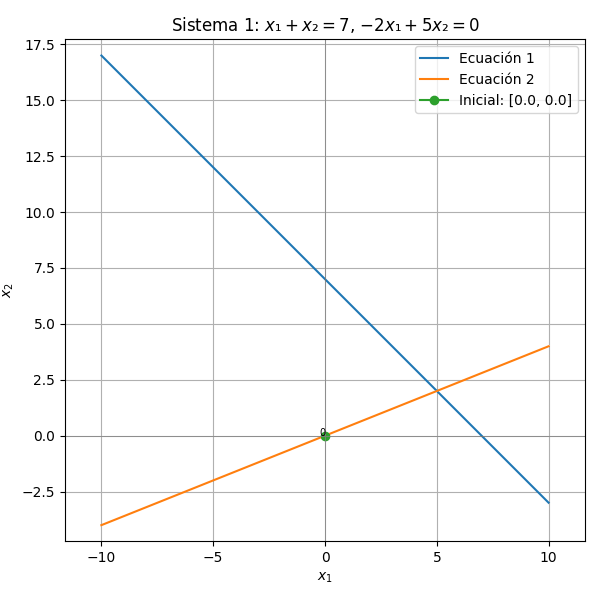

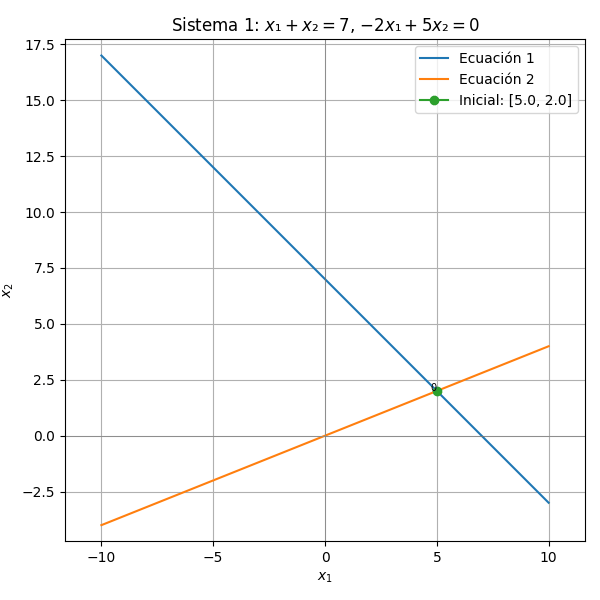

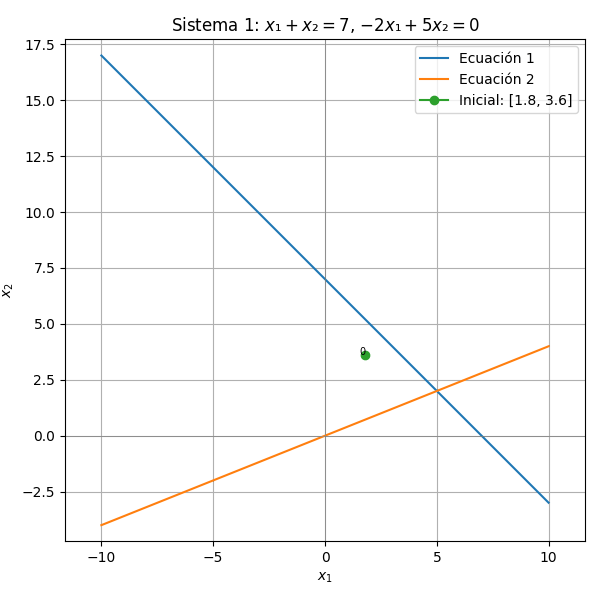

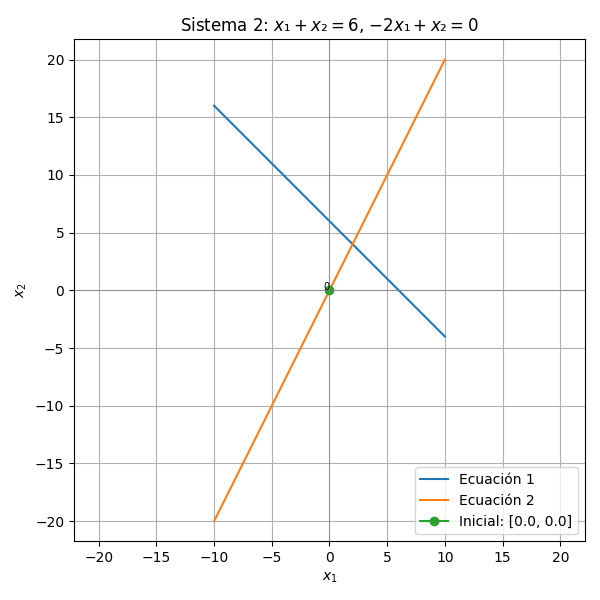

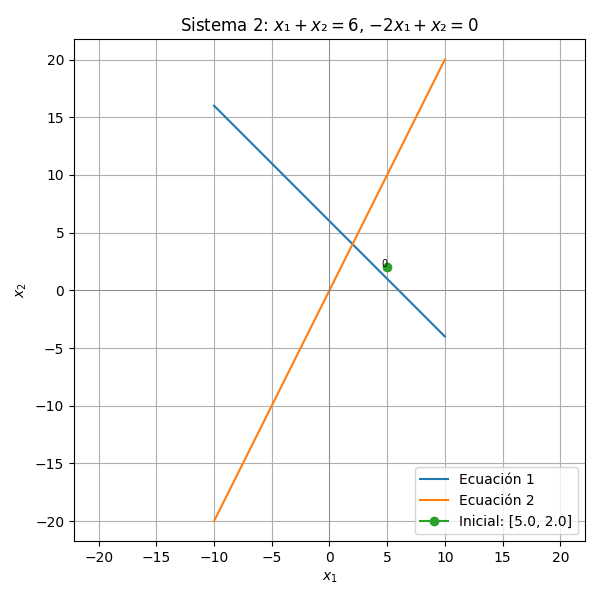

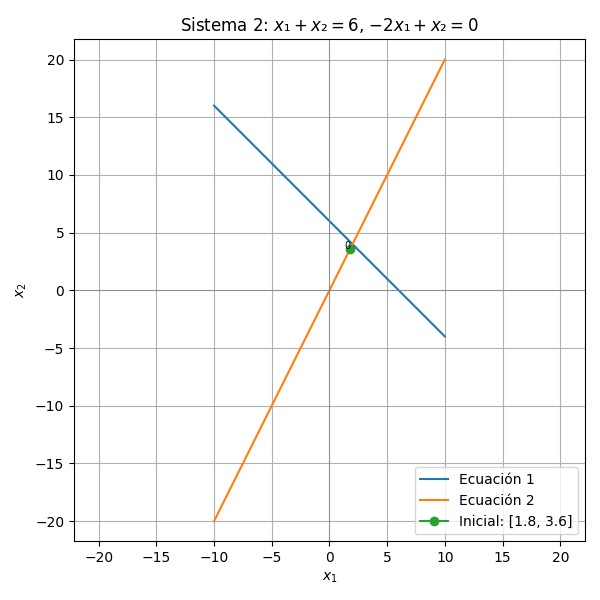

